### Fast Fourier transform of voice signal.
**Objective:** to develop software for reading audio data from an audio file, fragmenting them and make Fast Fourier transform of each fragment.


In [147]:
import scipy.io.wavfile as wavfile
import scipy
import scipy.fftpack as fftpk
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Audio

In [148]:
def plot_audio_signal(signal, s_rate):
  duration = len(signal)/s_rate
  time = np.arange(0, duration, 1/s_rate) #time vector
  plt.plot(time,signal)
  plt.xlabel('Time [s]')
  plt.ylabel('Amplitude')
  plt.title('cantina.wav')
  plt.show()

In [149]:
s_rate, signal = wavfile.read("cantina.wav") 

In [150]:
Audio(data=signal.T, rate=s_rate)

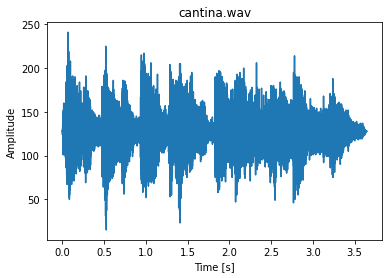

In [151]:
plot_audio_signal(signal, s_rate)

In [152]:
def get_fragments(signal, s_rate):
    for i in range(0, len(signal), s_rate):
        yield signal[i:i + s_rate]

In [153]:
def get_fft_fragments(signal_fragments):
  return [abs(scipy.fft(signal_fragment)) for signal_fragment in signal_fragments]

In [154]:
def get_freqs(fft_fragments, s_rate):
  return [
    fftpk.fftfreq(len(fft_fragment), (1.0/s_rate))
    for fft_fragment in fft_fragments
  ]

In [155]:
def plot_freqs(freqs, fft_fragments):
  for i in range(len(freqs)):
    plt.plot(freqs[i][range(len(fft_fragments[i])//2)], fft_fragments[i][range(len(fft_fragments[i])//2)])                                                          
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.show()

In [156]:
signal_fragments = list(get_fragments(signal, s_rate))

FFT_fragments = get_fft_fragments(signal_fragments)

freqs = get_freqs(FFT_fragments, s_rate)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  


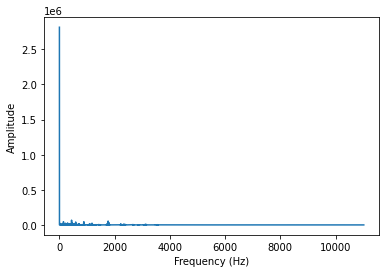

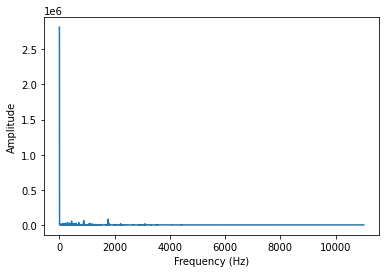

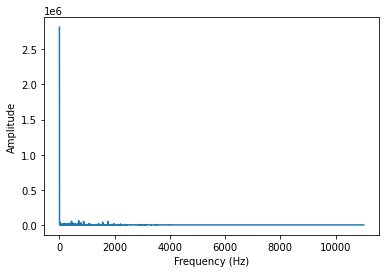

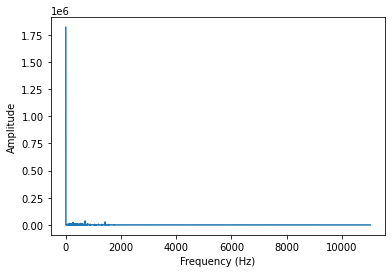

In [157]:
plot_freqs(freqs, FFT_fragments)

In [158]:
def reverse_fft(fft_fragments):
  newdata = []
  for fft_fragment in fft_fragments:
    newdata.append(fftpk.irfft(fft_fragment))
  return newdata

In [159]:
# Convert back to time domain
new_signal = np.concatenate(reverse_fft(FFT_fragments), axis=None)

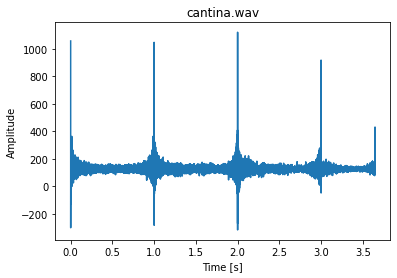

In [160]:
plot_audio_signal(new_signal, s_rate)

In [161]:
# And save it to a new wave file
wavfile.write("sad_cantina.wav", s_rate, new_signal)

In [162]:
Audio(data=new_signal.T, rate=s_rate)